<a href="https://colab.research.google.com/github/pranay8297/deep-learning-projects/blob/master/Mnist_own.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from fastai.basics import *

In [2]:
!wget http://deeplearning.net/data/mnist/mnist.pkl.gz

--2020-04-22 03:44:42--  http://deeplearning.net/data/mnist/mnist.pkl.gz
Resolving deeplearning.net (deeplearning.net)... 132.204.26.28
Connecting to deeplearning.net (deeplearning.net)|132.204.26.28|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16168813 (15M) [application/x-gzip]
Saving to: ‘mnist.pkl.gz’

mnist.pkl.gz        100%[===================>]  15.42M  9.35MB/s    in 1.6s    

2020-04-22 03:44:44 (9.35 MB/s) - ‘mnist.pkl.gz’ saved [16168813/16168813]



In [3]:
!ls

mnist.pkl.gz  sample_data


In [4]:
!pwd

/content


In [0]:
path = Path('/content')

In [0]:
with gzip.open(path/'mnist.pkl.gz', 'rb') as f:
  ((x_train, y_train), (x_valid, y_valid), _) = pickle.load(f, encoding='latin_1')

In [7]:
x_train, y_train

(array([[0., 0., 0., 0., ..., 0., 0., 0., 0.],
        [0., 0., 0., 0., ..., 0., 0., 0., 0.],
        [0., 0., 0., 0., ..., 0., 0., 0., 0.],
        [0., 0., 0., 0., ..., 0., 0., 0., 0.],
        ...,
        [0., 0., 0., 0., ..., 0., 0., 0., 0.],
        [0., 0., 0., 0., ..., 0., 0., 0., 0.],
        [0., 0., 0., 0., ..., 0., 0., 0., 0.],
        [0., 0., 0., 0., ..., 0., 0., 0., 0.]], dtype=float32),
 array([5, 0, 4, 1, ..., 0, 8, 4, 8]))

In [8]:
x_train.shape, y_train.shape

((50000, 784), (50000,))

In [0]:
x_train, y_train, x_valid, y_valid = map(torch.tensor, (x_train, y_train, x_valid, y_valid))

In [10]:
x_train.shape

torch.Size([50000, 784])

In [0]:
train_ds = TensorDataset(x_train, y_train)

In [0]:
valid_ds = TensorDataset(x_valid, y_valid)

In [0]:
bs = 64

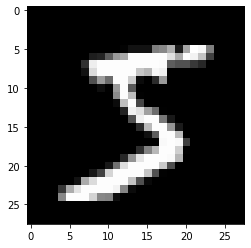

In [14]:
plt.imshow(x_train[0].reshape((28, 28)), cmap = 'gray')

In [0]:
data = DataBunch.create(train_ds, valid_ds, bs = bs)

In [16]:
y_train.max(), y_train.min()

(tensor(9), tensor(0))

In [0]:
class MnistLogistic(nn.Module):
  def __init__(self):
    super().__init__()
    self.lin = nn.Linear(784, 10, bias = True)
  
  def forward(self, xb):
    return self.lin(xb)

In [0]:
loss_function = nn.CrossEntropyLoss()

In [0]:
def update(x, y, lr):
  wd = 1e-05
  y_hat = model(x)
  w2 = 0
  
  for params in model.parameters(): w2 += (params**2).sum()
  loss = loss_function(y_hat, y) + w2*wd
  loss.backward()
  with torch.no_grad():
    for param in model.parameters():
      param.sub_(lr * param.grad)
      param.grad.zero_()
  return loss.item()

In [0]:
# def update(x,y,lr):
#     wd = 1e-5
#     y_hat = model(x)
#     # weight decay
#     w2 = 0.
#     for p in model.parameters(): w2 += (p**2).sum()
#     # add to regular loss
#     loss = loss_func(y_hat, y) + w2*wd
#     loss.backward()
#     with torch.no_grad():
#         for p in model.parameters():
#             p.sub_(lr * p.grad)
#             p.grad.zero_()
#     return loss.item()

In [0]:
model = MnistLogistic().cuda()

In [22]:
model

MnistLogistic(
  (lin): Linear(in_features=784, out_features=10, bias=True)
)

In [23]:
model.lin

Linear(in_features=784, out_features=10, bias=True)

In [24]:
data

DataBunch;

Train: <torch.utils.data.dataset.TensorDataset object at 0x7f2026006630>;

Valid: <torch.utils.data.dataset.TensorDataset object at 0x7f20260062b0>;

Test: None

In [0]:
xb, yb = next(iter(data.train_dl))

In [0]:
initial_preds = model.forward(xb)

In [27]:
initial_preds

tensor([[ 1.2248e-01,  6.2782e-02, -1.6277e-01,  9.2429e-02, -8.9448e-02,
         -1.2600e-01,  7.6857e-02,  6.1686e-02,  2.3784e-01, -3.4739e-01],
        [-1.1575e-02, -5.1242e-02,  2.9816e-01,  1.2307e-01, -1.2054e-01,
         -7.8406e-02,  6.0318e-02,  4.7470e-03,  9.9425e-02, -2.1584e-01],
        [-2.3575e-01,  3.4645e-02,  1.8121e-01,  1.2139e-01,  5.3587e-02,
          4.4489e-02,  1.4047e-01,  1.5377e-02, -3.3456e-02,  5.2850e-03],
        [-1.7809e-03,  2.9951e-01,  4.7364e-02,  7.9996e-02, -1.3956e-01,
         -3.2620e-01, -1.8438e-01,  1.1088e-01,  1.4437e-01, -1.7523e-01],
        [ 3.2689e-02,  9.8006e-02,  6.4209e-02,  2.2234e-01, -4.7188e-02,
         -2.5045e-01,  1.9758e-01, -2.1287e-01,  4.8723e-02,  2.8053e-02],
        [ 9.7091e-02, -7.2277e-02,  1.3993e-02, -8.5343e-02,  1.9931e-01,
         -7.5746e-02,  1.0479e-01, -1.0140e-01, -1.5133e-01, -8.2879e-02],
        [ 5.9879e-02, -2.0291e-01,  2.0769e-01,  1.3894e-01, -2.0713e-01,
          4.1740e-02,  3.4991e-0

In [0]:
lr = 1e-02
losses = [update(x, y, lr) for x, y in data.train_dl]

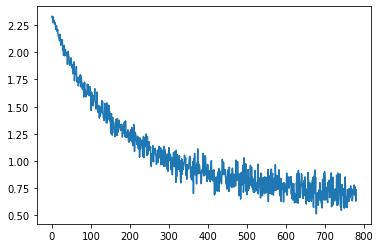

In [29]:
plt.plot(losses)

In [0]:
class MnistNN(nn.Module):
  def __init__(self):
    super().__init__()
    self.lin_1 = nn.Linear(784, 50, bias = True)
    self.lin_2 = nn.Linear(50, 10, bias = True)
  
  def forward(self, xb):
    x = F.relu(self.lin_1(xb))
    return self.lin_2(x)

In [0]:
def update(x, y, lr, model, lrs, backward = True):
  wd = 0
  y_hat = model(x)
  w2 = 0
  for params in model.parameters(): w2 += (params**2).sum()
  loss = loss_function(y_hat, y) + w2*wd
  loss.backward()
  if backward:
    with torch.no_grad():
      lr = lrs[0]
      layer = 0
      for param in model.parameters():
        if layer > 1:
          lr = lrs[1]
        param.sub_(lr * param.grad)
        param.grad.zero_()
        layer += 1
  return loss.item()

In [0]:
model = MnistNN().cuda()

In [33]:
model

MnistNN(
  (lin_1): Linear(in_features=784, out_features=50, bias=True)
  (lin_2): Linear(in_features=50, out_features=10, bias=True)
)


---



In [0]:
model_1 = MnistNN().cuda()

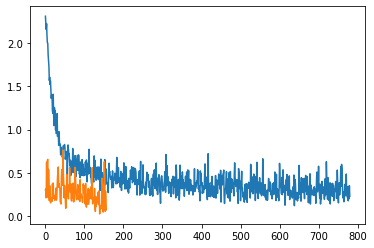

In [35]:
model_1 = MnistNN().cuda()
nn_losses = [update(x, y, lr, model_1, [5e-01, 1e-02]) for x, y in data.train_dl]
plt.plot(nn_losses)
valid_losses = [update(x, y, lr, model_1, [5e-02, 1e-02], False) for x, y in data.valid_dl]
plt.plot(valid_losses)

In [0]:
all_preds = []
all_results = []
for x, y in data.valid_dl:
  all_preds += model_1(x)
  all_results += list(y)

In [37]:
len(all_preds)

10000

In [38]:
len(all_results)

10000

In [0]:
actual_preds = [list(r).index(max(r)) for r in all_preds]

In [0]:
total_correct = 0
for j in range(len(actual_preds)):
  if actual_preds[j] == all_results[j]:
    total_correct += 1
acc = total_correct/len(actual_preds)

In [41]:
acc

0.9228

In [0]:
#implemented increasing gradient to early layers, turned out to work pretty well, without changing the loss function. I feel as the neural network is not a pretrained,
#one, and all the weights are initialized randomly, so the loss is important to earlier layers as it is to the last ones, but due to distributed gradient, The loss was 
#not getting propagated accordingly, so due to rise in learning rate, has helped to distribute the gradient to the earlier layers.

In [0]:
def update_optim(x, y, lr):
  opt = optim.SGD(model.parameters(), lr)
  y_hat = model(x)
  loss = loss_function(y_hat, y)
  loss.backward()
  opt.step()
  opt.zero_grad()
  return loss.item()

In [0]:
model_opt = MnistNN().cuda()

In [0]:
lr = 1e-02
opt_losses = [update_optim(x, y, lr) for x, y in data.train_dl]

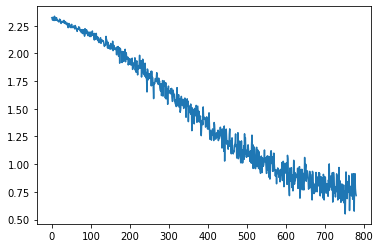

In [46]:
plt.plot(opt_losses)

In [0]:
def new_update_optim(x, y, lr):
  opt = optim.Adam(model_opt.parameters(), lr)
  y_hat = model_opt(x)
  loss = loss_function(y_hat, y)
  loss.backward()
  opt.step()
  opt.zero_grad()
  return loss.item()

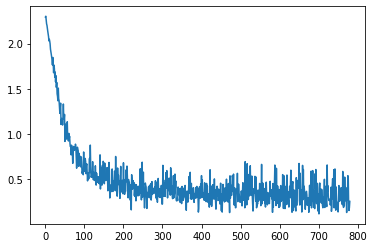

In [48]:
model_opt = MnistNN().cuda()
lr = 1e-03
opt_losses = [new_update_optim(x, y, 1e-03) for x, y in data.train_dl]
plt.plot(opt_losses)